In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl

from expose.instruments import MAVIS
from expose.telescopes import VLT
from expose.sources import galaxy_source
from expose.sky import sky_source

## First initilize the source and sky model

In [2]:
skyModel = sky_source(offline=True)
sourceModel = galaxy_source()

## Set source and sky parameters.  

In this case we're assuming a relatively dark sky with FLI=0.3 and a bright-ish source at z=0.01.

In [10]:
skyModel.set_params(fli=0.3, airmass=1.2, pwv=10)
sourceModel.set_params(template='Sc', redshift=1, obs_mag=22, obs_band='sdss_r')

## initialize the telescope and instrument.  
In principle there is nothing stopping mixing and matching instruments on different
telescopes, modulo changes to the FoV etc.

In [11]:
tel = VLT()
spec = MAVIS(mode='LR-red', pix_scale=0.025, jitter=40)

## Run the observations and plot the output.  Returns predicted S/N per pixel.

In [12]:
wave_mavis, sn_mavis = spec.observe(sourceModel, tel, sky=skyModel, seeing=0.8, dit=900, ndit=4, binning=1)

S/N=1.9389446229401888 at 0.7um with NDIT=4 and DIT=900


## Just to check, pull out ensquared energy profile

<IPython.core.display.Javascript object>


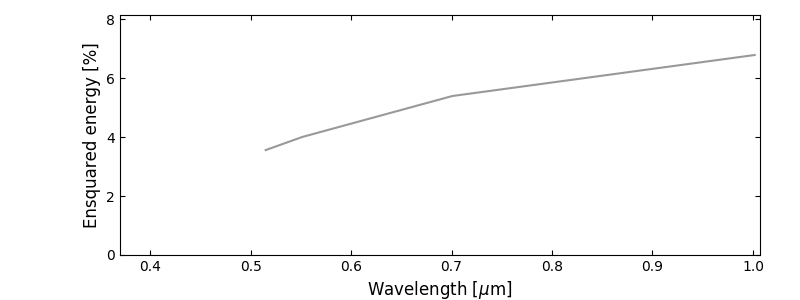

In [13]:
fig = pl.figure(figsize=(8,3))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
ax.plot(wave_mavis, spec.obs_ee*100, '-', color='0.6')
ax.axis([0.37,1.007,0,spec.obs_ee.max()*1.2*100])

ax.set_ylabel('Ensquared energy [%]', size=12)
ax.set_xlabel('Wavelength [$\mu$m]', size=12)

pl.show()

## Plot S/N

<IPython.core.display.Javascript object>


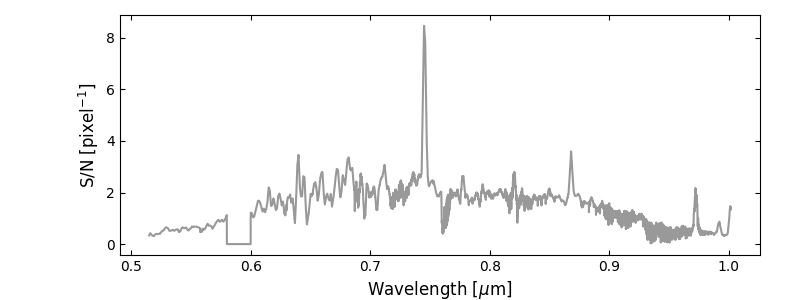

In [14]:
fig = pl.figure(figsize=(8,3))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
ax.plot(wave_mavis, sn_mavis, '-', color='0.6')

ax.set_ylabel('S/N [pixel$^{-1}$]', size=12)
ax.set_xlabel('Wavelength [$\mu$m]', size=12)

pl.show()

## Plot throughput curve

<IPython.core.display.Javascript object>


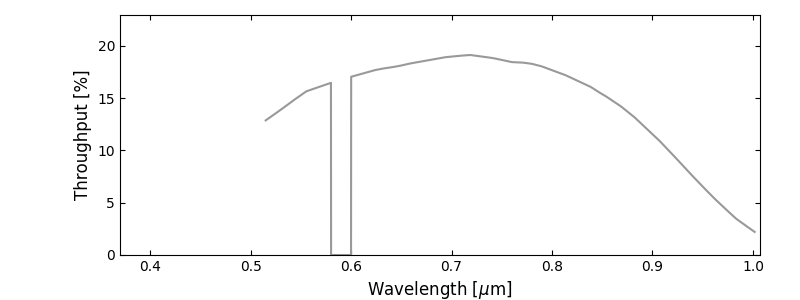

In [15]:
fig = pl.figure(figsize=(8,3))
ax = fig.add_axes([0.15,0.15,0.8,0.8])
ax.plot(wave_mavis, spec.tpt*100, '-', color='0.6')

ax.set_ylabel('Throughput [%]', size=12)
ax.set_xlabel('Wavelength [$\mu$m]', size=12)
ax.axis([0.37,1.007,0,spec.tpt.max()*100*1.2])

pl.show()